# Clustering Epi Communities

In this notebook we'll attempt to cluster classify the different epi communities

# 1. Load data and Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the data

raw_df = pd.read_csv('datasets/epi_communities - epi_communities.csv')
raw_df[:3]

,EPI_ID,EPI_T_EN,IMM_S,TS_C,TS_N_EN,CT_C,CT_N_MM,VW_C,VW_T,VI_C,HF_L1_C,HF_L1_T,EPI_S_P,EP_S_U1,EP_S_U5,EP_S_U15,EP_S_PW,EP_S_WCBA
0,EPI00001559,Workers settlement,F,MMR013005,Taikkyi,NaN,NaN,MMR013005067,Village Track,150060,HF008182,Sub Rural Health Center,37.0,0.0,7.0,14.0,2.0,10.0
1,EPI00001870,Village,F,MMR013006,Htantabin,NaN,NaN,MMR013006048,Village Track,150167,HF008162,Rural Health Center,947.0,22.0,36.0,189.0,25.0,255.0
2,EPI00001871,Other settlement,F,MMR013006,Htantabin,NaN,NaN,MMR013006048,Village Track,150167,HF008162,Rural Health Center,89.0,0.0,5.0,25.0,1.0,26.0


In [3]:
len(raw_df)

553

In [4]:
raw_df.isnull().sum()

EPI_ID         0
EPI_T_EN       0
IMM_S          1
TS_C           0
TS_N_EN        0
CT_C         435
CT_N_MM      435
VW_C           0
VW_T           0
VI_C         119
HF_L1_C        0
HF_L1_T        0
EPI_S_P        1
EP_S_U1        1
EP_S_U5        1
EP_S_U15       1
EP_S_PW        1
EP_S_WCBA      1
dtype: int64

In [58]:
raw_df['CT_C'].value_countsounts()

MMR013008701    56
MMR013038701    29
MMR013039701    18
MMR013033701     9
MMR013006701     6
Name: CT_C, dtype: int64

## 1.1 Data Cleaning

A lot of null values for `CT_C` and `CT_N_MM`, let's remove them.
Lengthy classes with numerous null or unknown data `VI_C`, lengthy `VW_C`, `HF_L1_C`
For now let's keep the IDS to be used later `EPI_ID`

**Important points**
- `HF_L1_T` has a lot of null vales in the following form: `?????????????`

In [5]:
col_df = raw_df.drop(['CT_C', 'CT_N_MM', 'VW_C', 'VI_C', 'HF_L1_C'], axis=1)
col_df.isnull().sum()

EPI_ID       0
EPI_T_EN     0
IMM_S        1
TS_C         0
TS_N_EN      0
VW_T         0
HF_L1_T      0
EPI_S_P      1
EP_S_U1      1
EP_S_U5      1
EP_S_U15     1
EP_S_PW      1
EP_S_WCBA    1
dtype: int64

### a. Replace null values

IMM_S has NaN value on row 55, and row 211 is missing all EP_S.. values

In [6]:
df = col_df.drop([55, 211], axis=0)

In [7]:
nul = pd.isnull(df['EPI_S_P'])
df.isnull().sum()

EPI_ID       0
EPI_T_EN     0
IMM_S        0
TS_C         0
TS_N_EN      0
VW_T         0
HF_L1_T      0
EPI_S_P      0
EP_S_U1      0
EP_S_U5      0
EP_S_U15     0
EP_S_PW      0
EP_S_WCBA    0
dtype: int64

**Replace `HF_L1_T` '???????' with an appropriate value or delete**
Because it represents only 9 rows on 552, we could delete it. In this case we decide to represent it with a categorical value instead.

In [8]:
df['HF_L1_T'].value_counts()

Sub Rural Health Center             374
Rural Health Center                  71
Urban Health Center                  43
Sub Urban Health Center              36
Station Health Unit                  12
????????????????????                  9
Maternal and Child Health Center      6
Name: HF_L1_T, dtype: int64

### b. Transform data to binary or multi class

In [9]:
# replacing values
df['EPI_T_EN'].replace(['Village', 'Other settlement', 'Ward', 'Workers settlement', 'Ward (p)', 'Army'],
                        [0, 1, 2, 3, 4, 5], inplace=True)
df['IMM_S'].replace(['O', 'F'], [0, 1], inplace=True)
df['TS_C'].replace(['MMR013006', 'MMR013008', 'MMR013038', 'MMR013039', 'MMR013033', 'MMR013005', 'MMR017021'],
                  [0, 1, 2, 3, 4, 5, 6], inplace = True)
df['TS_N_EN'].replace(['Htantabin', 'Hlaingtharya', 'Kyeemyindaing', 'Sanchaung', 'Kyauktada', 'Taikkyi', '?Nyaungdon'], 
                     [0, 1, 2, 3, 4, 5, 6], inplace=True)
df['VW_T'].replace(['Village Track', 'Ward'], [0, 1], inplace=True)
df['HF_L1_T'].replace(['Sub Rural Health Center', 'Rural Health Center', 'Urban Health Center', 'Sub Urban Health Center', 'Station Health Unit', '????????????????????', 'Maternal and Child Health Center']
                     , [0, 1, 2, 3, 4, 5, 6], inplace= True)

epi_id_idf = df['EPI_ID']
df.drop(['EPI_ID'], axis=1, inplace=True)
df

,EPI_T_EN,IMM_S,TS_C,TS_N_EN,VW_T,HF_L1_T,EPI_S_P,EP_S_U1,EP_S_U5,EP_S_U15,EP_S_PW,EP_S_WCBA
0,3,1,5,5,0,0,37.0,0.0,7.0,14.0,2.0,10.0
1,0,1,0,0,0,1,947.0,22.0,36.0,189.0,25.0,255.0
2,1,1,0,0,0,1,89.0,0.0,5.0,25.0,1.0,26.0
3,0,0,0,0,0,1,386.0,3.0,7.0,39.0,3.0,70.0
4,0,0,0,0,0,0,186.0,3.0,9.0,43.0,3.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...
548,1,0,0,0,0,1,32.0,0.0,1.0,4.0,0.0,10.0
549,1,1,0,0,0,1,68.0,1.0,1.0,16.0,0.0,18.0
550,1,0,0,0,0,1,286.0,5.0,26.0,30.0,2.0,78.0
551,0,0,1,1,0,1,1869.0,49.0,184.0,299.0,40.0,575.0


Above: Dataset without IDs for Clustering

Below: Indexes of each ID for future use

In [10]:
epi_id_idf

0      EPI00001559
1      EPI00001870
2      EPI00001871
3      EPI00001868
4      EPI00001726
          ...     
548    EPI00001725
549    EPI00001865
550    EPI00001866
551    EPI00003141
552    EPI00003120
Name: EPI_ID, Length: 551, dtype: object

# 2. Model

## 2.1 K-Means clustering

**a. Finding the right K cluster using Elbow Method**

In [11]:
# Initialize a k-means model given a dataset

def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k]
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

# Run one iteration of k-means

def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

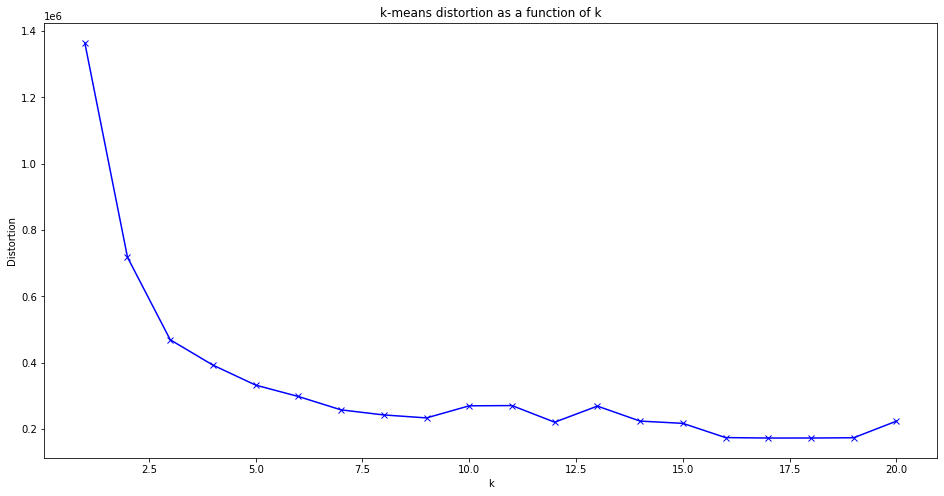

In [12]:
# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    means = init_kmeans(X, k)
    prev_distortion = 0
    while True:
        means, c, distortion = iterate_kmeans(X, means)
        if prev_distortion > 0 and prev_distortion - distortion < epsilon:
            break
        prev_distortion = distortion
    distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

**b. Silhouette Method**

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

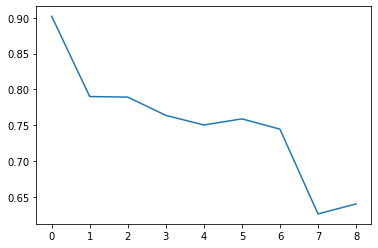

In [19]:
plt.plot(sil)
plt.show()

The analysis suggest that 6 is the right number of clusters

In [32]:
n_clusters = 6

In [48]:
km = KMeans(
    n_clusters=n_clusters, init='random',
    n_init=10, max_iter=1000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [49]:
print(y_km)

[5 3 5 5 5 5 5 3 3 4 3 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 3 5 5 5 5 3 3 3 2 5 3
 5 3 5 3 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 3 3 5 5 5 5 5 5 5 5 3
 5 5 3 5 5 3 5 5 5 5 5 3 5 3 5 3 5 5 5 3 3 5 5 5 5 5 5 5 3 3 5 3 5 5 5 5 5
 5 5 5 5 5 5 2 4 4 3 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 3 5 3
 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 3 3 5 5 3 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5
 5 5 3 5 5 5 5 5 5 5 3 2 3 2 2 5 5 2 3 5 3 3 2 5 5 2 5 5 5 5 5 5 5 5 2 3 3
 5 3 3 5 3 3 5 5 5 5 5 3 5 5 3 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 3 4 5 5 5 5 5
 3 5 3 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 1 5 3 5 5 5 3 5 5 5 5 3 3 3
 2 3 3 4 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 3 3 5 3 5 5 5 5 5 3 5 5 5 5 5 5 4 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5
 5 5 3 5 5 5 5 5 5 5 4 5 5 5 2 4 4 4 4 4 4 2 2 2 4 4 4 4 4 4 2 4 4 4 4 3 4
 2 2 2 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 3 2 5 1 5 5 4 1 1 1 1 1 5 5 5 1 5 3
 1 5 3 3 0 0 3 3 3 5 2 3 5 5 3 4 4 0 5 3 3 3 4 2 4 3 4 3 3 3 4 3 3 3 0 3 5
 3 5 5 3 1 4 1 4 3 1 2 5 

**Concat ID and class**

In [50]:
classification_df = pd.DataFrame({'EPI_ID': epi_id_idf, 'CLASS': y_km})
classification_df

,EPI_ID,CLASS
0,EPI00001559,5
1,EPI00001870,3
2,EPI00001871,5
3,EPI00001868,5
4,EPI00001726,5
...,...,...
548,EPI00001725,5
549,EPI00001865,5
550,EPI00001866,5
551,EPI00003141,3


**Export to CSV**

In [57]:
!mkdir outputs
classification_df.to_csv('outputs/classification_results.csv', index=False)
print("Done")

Done


## 2.2 Gaussian Mixture Model

## 2.3 SVM

# 3 Summary of results

In [31]:
def get_summary(target, col_names):
    
    '''
    Get summary of data for each class
    For continuous values
    - Min and Max
    - Median
    - Mean
    For discrete values
    - Most frequent category for that class
    - Least one
    - Distribution with plotting
    '''
    # 1. Drop other classes and create new dataframe
    
    # 2. Find mean, median, max and min for continuous values
    
    # 3. Find most frequent category for that class and the least one
    
    # 4. Plot distribution
    
    return
    
    
    
    
    
    

In [54]:
col_names = ['EPI_T_EN', 'IMM_S', 'TS_C', 'TS_N_EN', 'VW_T', 'HF_L1_T',
'EPI_S_P', 'EP_S_U1', 'EP_S_U5', 'EP_S_U15', 'EP_S_PW', 'EP_S_WCBA']

In [55]:
for k in range(n_clusters):
    print(f"==================== Data summary for class {k} ====================")
    values = get_summary(k, col_names)
    

==================== Data summary for class 0 ====================
==================== Data summary for class 1 ====================
==================== Data summary for class 2 ====================
==================== Data summary for class 3 ====================
==================== Data summary for class 4 ====================
==================== Data summary for class 5 ====================
